1. **Load and Preprocess the MNIST Dataset**

* Load the MNIST dataset using TensorFlow/Keras

In [1]:
import tensorflow as tf
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

* Normalize the image pixel values to be between 0 and 1

In [2]:
x_train = tf.cast(x_train, tf.float32)/255.0
x_test = tf.cast(x_test, tf.float32)/255.0

* Convert labels into one-hot encoded format

In [3]:
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

* Split the dataset into training and test sets

The MNIST dataset is already pre-split into training and test sets, so no additional splitting is needed.

* Display sample images with their corresponding labels

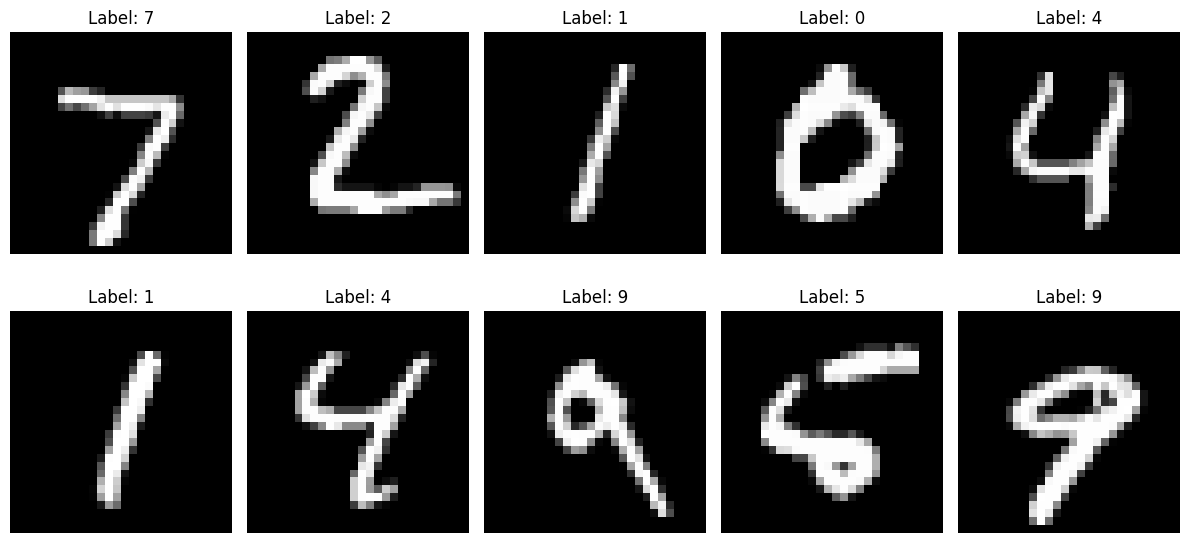

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    label = tf.argmax(y_test[i]).numpy()    # Convert one-hot to integer
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


2. **Build a Fully Connected Neural Network**

* Define a sequential model using Keras
* Flatten the 28x28 input images into a single vector
* Add two hidden layers with ReLU activation
* Add an output layer with Softmax activation for multi-class classification

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


* Compile the model using categorical cross-entropy as the loss function and accuracy as the evaluation metric

In [6]:
model.compile(
    optimizer='adam',
    loss=tf.losses.CategoricalCrossentropy(from_logits=False),  # same as loss='categorical_crossentropy'
    metrics=['accuracy']
)

3. **Train the Neural Network**

* Fit the model to the training data for 10 epochs
* Use a validation set to track performance during training
* Observe the loss and accuracy trends over the epochs

In [7]:
model.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8842 - loss: 0.4014 - val_accuracy: 0.9617 - val_loss: 0.1202
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9703 - loss: 0.0976 - val_accuracy: 0.9683 - val_loss: 0.0970
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9792 - loss: 0.0652 - val_accuracy: 0.9758 - val_loss: 0.0822
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9847 - loss: 0.0473 - val_accuracy: 0.9763 - val_loss: 0.0795
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9875 - loss: 0.0378 - val_accuracy: 0.9765 - val_loss: 0.0829
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9904 - loss: 0.0287 - val_accuracy: 0.9719 - val_loss: 0.1082
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9916 - loss: 0.0260 - val_accuracy: 0.9768 - val_loss: 0.0790
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9934 - loss: 0.0189

4. **Evaluate the Model’s Performance**

* Compute accuracy on the test dataset

In [8]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9677 - loss: 0.1345


[0.11279650777578354, 0.9736999869346619]

* Display a confusion matrix for misclassified digits

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


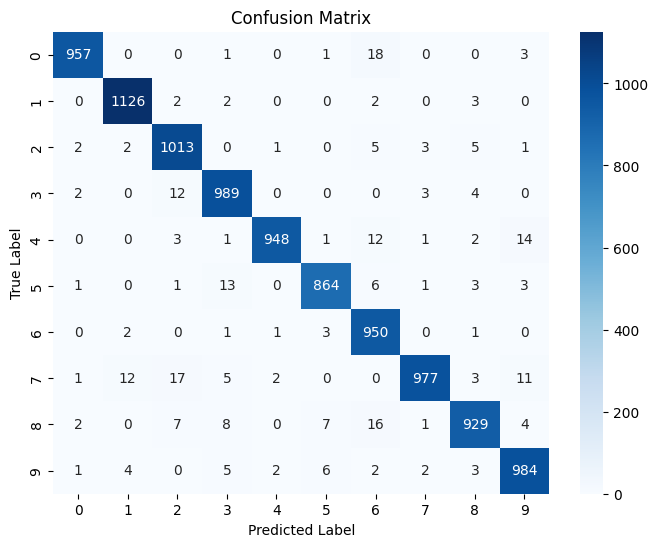

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Make predictions on the test set (returns 10 probabilities per image)
y_pred_probs = model.predict(x_test)

# 2. Convert predicted probabilities to predicted class indices (0–9)
y_pred_classes = tf.argmax(y_pred_probs, axis=1).numpy()

# 3. Convert one-hot encoded true labels to class indices
y_true_classes = tf.argmax(y_test, axis=1).numpy()

# 4. Compute the confusion matrix (true vs. predicted classes)
cm = confusion_matrix(y_true_classes, y_pred_classes)

# 5. Plot the confusion matrix using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")  # fmt="d" shows integers
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


* Identify which digits the model struggles with the most

Most digits were predicted accurately, but we can observe some notable misclassifications.

For example, the digit 5 was mistaken 13 times for a 3 and 6 times for a 6, or the digit 0 was mistaken 18 times for a 6, likely due to their similar rounded shapes.

These confusions highlight how certain digits with overlapping features can challenge the model’s precision.